In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.covariance
import sklearn.mixture
import pandas as pd


In [6]:
t = np.array([5,10,15,20,25,30])
h = np.array([722, 1073, 1178,1177,781,102])

X = np.c_[np.ones(6), t]

Xt = np.transpose(X)

inv = np.linalg.inv(np.dot(Xt, X))
tr = np.dot(inv, Xt)
coefs = np.dot(tr, h)

In [7]:
from sklearn.linear_model import LinearRegression as reg

res = reg().fit(X, h)

In [17]:
def RegressionWithCosts(s, y, costs=None):
    X = np.c_[np.ones(s.shape[0]), s]
    Xt = np.transpose(X)
    if costs is None:
        W = np.eye(s.shape[0])
    else:
        W = np.diag(costs)

    inv = np.linalg.inv(np.dot(np.dot(Xt, W), X))
    coefs = np.dot(np.dot(np.dot(inv, Xt), W), y)
    return coefs


In [9]:
RegressionWithCosts(t, h)

array([1236.53333333,  -22.72571429])

In [10]:
x1 = np.array([0,1,1.9,2])
y1 = np.array([0.1,1.9,4.1,5])
c1 = RegressionWithCosts(x1, y1)

x2 = np.array([2,3.1,4,5])
y2 = np.array([5,5.9,7,8.5])
RegressionWithCosts(x2, y2)

array([2.48420785, 1.16760061])

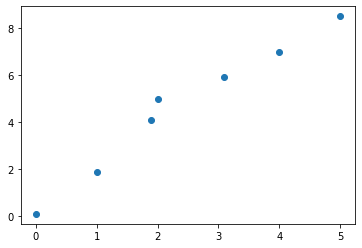

In [12]:
x = [0,1,1.9,2,3.1,4,5]
y = [0.1,1.9,4.1,5,5.9,7,8.5]
plt.scatter(x, y)
plt.show()

In [24]:
x3 = np.array([5,10,15,20,25, 30])
y3 = [732, 1083, 1188, 1187, 791, 112]
costs3 = [1,1,1,2,1.5,0.5]
x_o = np.c_[x3, x3**2]

RegressionWithCosts(x_o, y3, costs3)

array([ 41.645682  , 158.09096045,  -5.13819209])